# Testando o modelo detector de emoções

## 1 - Importação das bibliotecas

In [185]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import zipfile
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

In [186]:
%tensorflow_version 2.x
tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

## 2 - Conectando com o Drive e acessando os arquivos

In [187]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [188]:
path = '/content/gdrive/MyDrive/Material.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/gdrive/MyDrive/Material.zip' mode='r'>>

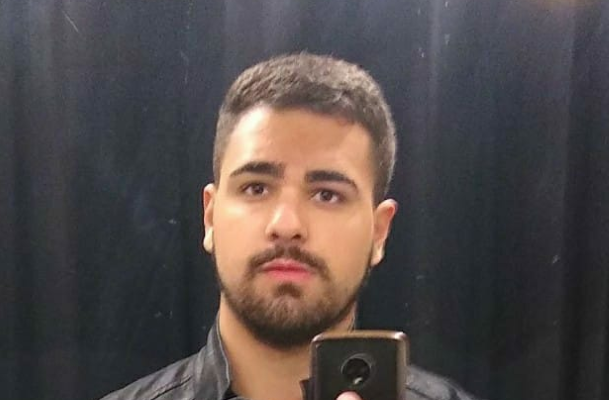

In [189]:
imagem = cv2.imread('Material/testes/teste_matheus.png')
cv2_imshow(imagem)

## Testando o detector

#### Carregamento dos modelos

In [190]:
cascade_faces = '/content/Material/haarcascade_frontalface_default.xml'
caminho_modelo = '/content/Material/modelo_01_expressoes.h5'
face_detection = cv2.CascadeClassifier(cascade_faces)
classificador_emocoes = load_model(caminho_modelo, compile = False)
expressoes = ['Raiva','Nojo','Medo','Feliz','Triste','Surpreso','Neutro']

#### Detecção de faces

In [191]:
original = imagem.copy()
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1, minNeighbors= 3, minSize = (20, 20))

#### Extração do ROI (region of interest)

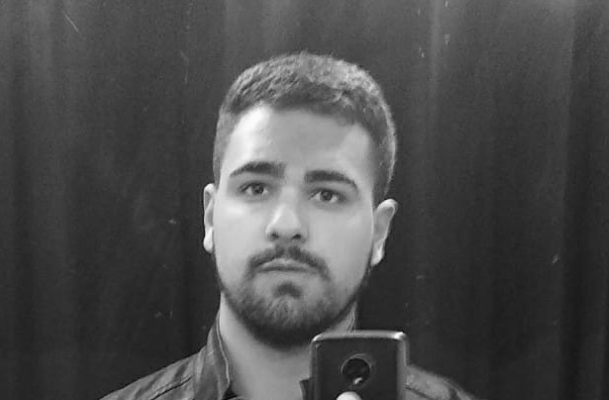

In [192]:
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
cv2_imshow(cinza)

In [193]:
roi = cinza[90:192 + 120, 210:248 + 128]

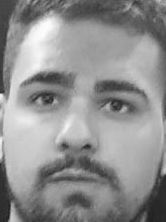

In [194]:
cv2_imshow(roi)


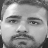

In [195]:
roi = cv2.resize(roi, (48, 48))
cv2_imshow(roi)

array([[ 72,  70,  70, ..., 148, 150, 150],
       [ 71,  70,  71, ..., 122, 128, 122],
       [ 69,  72,  69, ..., 111, 106, 100],
       ...,
       [ 45,  49,  46, ...,  40,  40,  40],
       [ 47,  50,  42, ...,  41,  40,  42],
       [ 44,  46,  83, ...,  40,  39,  41]], dtype=uint8)
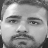

In [196]:
roi

In [197]:
roi = roi.astype('float')

In [198]:
roi = roi / 255
roi

array([[0.28235294, 0.2745098 , 0.2745098 , ..., 0.58039216, 0.58823529,
        0.58823529],
       [0.27843137, 0.2745098 , 0.27843137, ..., 0.47843137, 0.50196078,
        0.47843137],
       [0.27058824, 0.28235294, 0.27058824, ..., 0.43529412, 0.41568627,
        0.39215686],
       ...,
       [0.17647059, 0.19215686, 0.18039216, ..., 0.15686275, 0.15686275,
        0.15686275],
       [0.18431373, 0.19607843, 0.16470588, ..., 0.16078431, 0.15686275,
        0.16470588],
       [0.17254902, 0.18039216, 0.3254902 , ..., 0.15686275, 0.15294118,
        0.16078431]])

In [199]:
roi = img_to_array(roi)
roi

array([[[0.28235295],
        [0.27450982],
        [0.27450982],
        ...,
        [0.5803922 ],
        [0.5882353 ],
        [0.5882353 ]],

       [[0.2784314 ],
        [0.27450982],
        [0.2784314 ],
        ...,
        [0.47843137],
        [0.5019608 ],
        [0.47843137]],

       [[0.27058825],
        [0.28235295],
        [0.27058825],
        ...,
        [0.43529412],
        [0.41568628],
        [0.39215687]],

       ...,

       [[0.1764706 ],
        [0.19215687],
        [0.18039216],
        ...,
        [0.15686275],
        [0.15686275],
        [0.15686275]],

       [[0.18431373],
        [0.19607843],
        [0.16470589],
        ...,
        [0.16078432],
        [0.15686275],
        [0.16470589]],

       [[0.17254902],
        [0.18039216],
        [0.3254902 ],
        ...,
        [0.15686275],
        [0.15294118],
        [0.16078432]]], dtype=float32)

In [200]:
roi.shape

(48, 48, 1)

In [201]:
roi = np.expand_dims(roi, axis=0)
roi.shape

(1, 48, 48, 1)

#### Previsões

In [202]:
preds = classificador_emocoes.predict(roi)[0]

1/1 [==============================] - 0s 247ms/step


In [203]:
preds

array([0.23188062, 0.01630661, 0.19193763, 0.01475812, 0.32806078,
       0.01146266, 0.20559357], dtype=float32)

In [204]:
len(preds)

7

In [205]:
emotion_probability = np.max(preds)
emotion_probability

0.32806078

In [206]:
preds.argmax()

4

In [207]:
label = expressoes[preds.argmax()]
label

'Triste'

#### Resultados

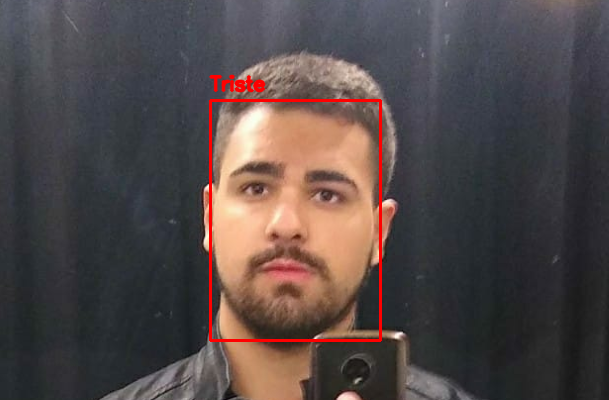

In [210]:
cv2.putText(original, label, (210, 100-10), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 255), 2, cv2.LINE_AA)
# Atualizando cv2.rectangle com as novas coordenadas baseadas no recorte roi
cv2.rectangle(original, (210, 100), (380, 340), (0, 0, 255), 2)

# Exibindo a imagem
cv2_imshow(original)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
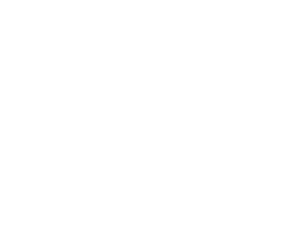

In [213]:
probabilidades = np.ones([250, 300, 3], dtype = 'uint8') * 255
probabilidades

In [214]:
probabilidades.shape

(250, 300, 3)

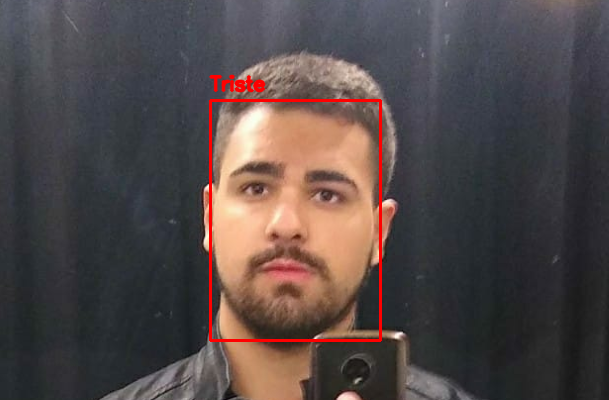

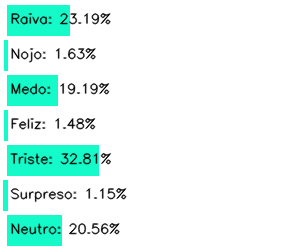

In [215]:
cv2_imshow(original)
if len(faces) == 1:
  for (i, (emotion, prob)) in enumerate(zip(expressoes, preds)):
    text = '{}: {:.2f}%'.format(emotion, prob*100)
    w = int(prob * 300)
    cv2.rectangle(probabilidades, (7, (i * 35) + 5), (w, (i * 35) + 35), (200, 250, 20), -1)
    cv2.putText(probabilidades, text, (10, (i * 35) + 23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, [0, 0, 0], 1,cv2.LINE_AA)
cv2_imshow(probabilidades)